<a href="https://colab.research.google.com/github/ptran1203/pytorch-animeGAN/blob/master/notebooks/animeGAN_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import output
import torch

repo = "Pytorch-animeGAN"
%cd "/content"
!rm -rf {repo}
!git clone https://github.com/ptran1203/{repo}
%cd {repo}
output.clear()

In [2]:
from inference import Predictor
predictor= Predictor('hayao:v2')

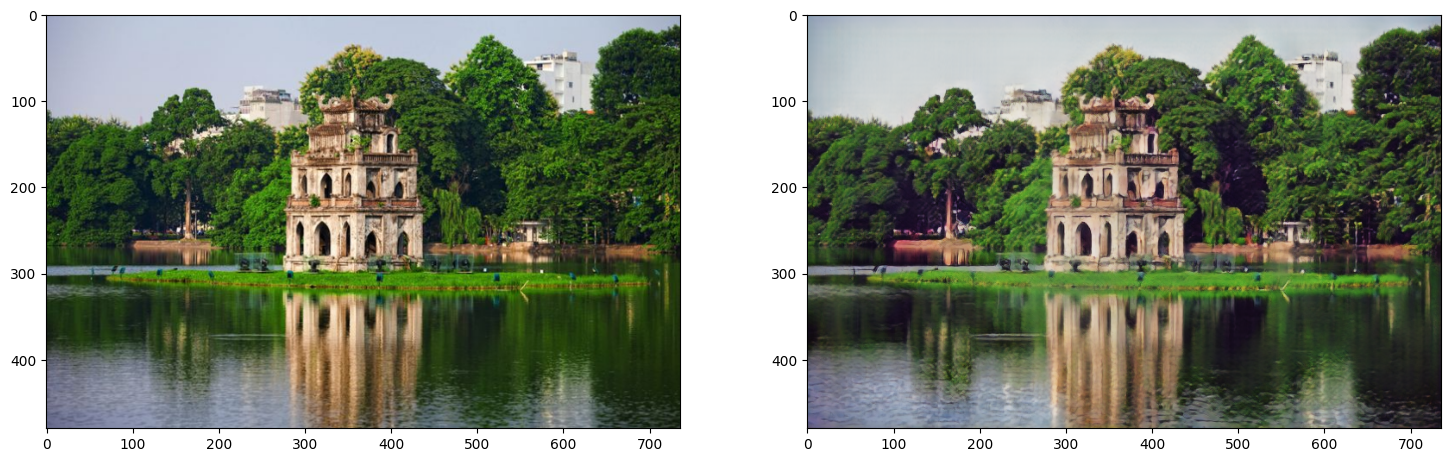

In [7]:
import cv2
import random
import matplotlib.pyplot as plt
import os
import numpy as np
from utils import read_image, resize_image

def random_img(img_dir):
    files = [f for f in os.listdir(img_dir) if 'anime' not in f]
    p = os.path.join(img_dir, random.choice(files))
    return resize_image(read_image(p), width=612)

# image = random_img('./example/result')
url = 'https://vcdn1-dulich.vnecdn.net/2022/05/11/hoan-kiem-lake-7673-1613972680-1508-1652253984.jpg?w=0&h=0&q=100&dpr=1&fit=crop&s=2wB1cBTUcNKuk68nrG6LMQ'
image = resize_image(read_image(url))

anime_img = (predictor.transform(image) + 1) / 2

fig = plt.figure(figsize=(18, 25))
fig.add_subplot(1, 2, 1)
plt.imshow(image)
fig.add_subplot(1, 2, 2)
plt.imshow(anime_img[0])
plt.show()

In [4]:
!python3 inference_video.py --checkpoint hayao\
                        --src /content/trailer.mp4\
                        --dest /content/trailer_anime.mp4\
                        --batch-size 2

usage: inference_video.py [-h] [--weight WEIGHT] [--src SRC] [--out OUT] [--batch-size BATCH_SIZE]
                          [--start START] [--end END]
inference_video.py: error: unrecognized arguments: --checkpoint hayao --dest /content/trailer_anime.mp4
